In [17]:
import numpy as np
import method.gradient_descent as gd
import method.dichotomy_gradient as dg
import method.wolfe_gradient as wg
import method.func_normalization as fn
import plot.plotter as plotter


In [18]:

def f(x):
    return 10000 * x[0] ** 2 + x[1] ** 2


def grad(func):
    h = 1e-5
    return lambda x: (func(x[:, np.newaxis] + h * np.eye(2)) - func(x[:, np.newaxis] - h * np.eye(2))) / (2 * h)

In [19]:
def get_data(start, n, step):
    lr = 0.05

    gradient = [[], [], []]
    dichotomy = [[], [], []]
    wolfe = [[], [], []]

    for s in range(1, n, step):
        func = fn.func_normalization(f, s)
        (points1, grad_calc1, func_calc1) = gd.gradient_descent(func, grad(func), start, 1e-4, lr, 100000)
        gradient[0].append([s, grad_calc1])
        gradient[1].append([s, func_calc1])
        gradient[2].append([s, func(points1[-1])])
        (points2, grad_calc2, func_calc2) = dg.dichotomy_gradient(func, grad(func), start, 1e-4, 1e-3, 0.5)
        dichotomy[0].append([s, grad_calc2])
        dichotomy[1].append([s, func_calc2])
        dichotomy[2].append([s, func(points2[-1])])

        (points3, grad_calc3, func_calc3) = wg.wolfe_gradient(func, grad(func), start, 1e-4, alpha=0.5)
        wolfe[0].append([s, grad_calc3])
        wolfe[1].append([s, func_calc3])
        wolfe[2].append([s, func(points3[-1])])

    return gradient, dichotomy, wolfe

In [20]:
def show_plot(gdesc, dich, wolf, start, index, name):
    plotter.plot_by_array([np.asarray(gdesc[index]), np.asarray(dich[index]), np.asarray(wolf[index])], start, name).show()

In [21]:
def plots_by_start(start):
    (gdesc, dich, wolf) = get_data(start, 50, 2)
    show_plot(gdesc, dich, wolf, start, 0, "gradient calculations")
    show_plot(gdesc, dich, wolf, start, 1, "function calculations")
    show_plot(gdesc, dich, wolf, start, 2, "result value")

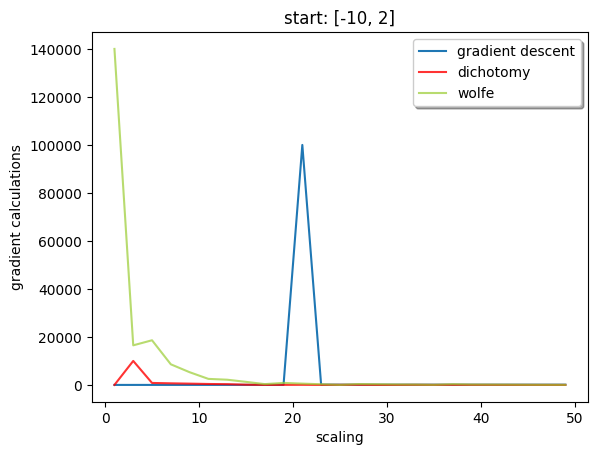

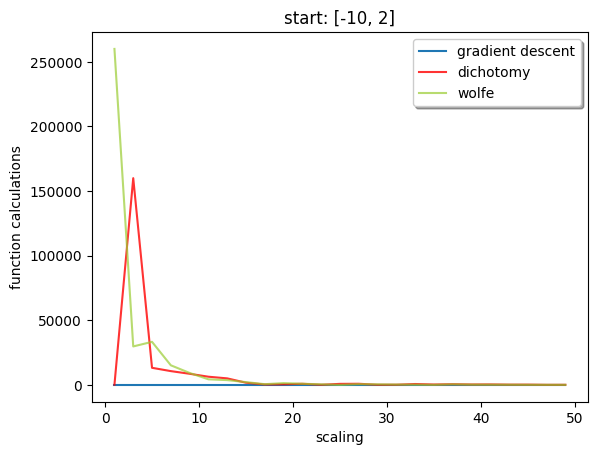

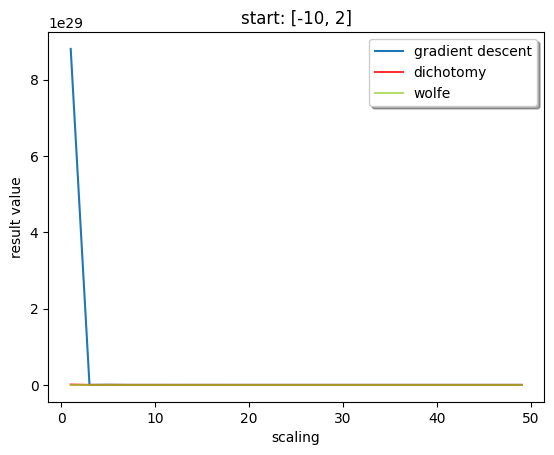

In [22]:
plots_by_start([-10, 2])

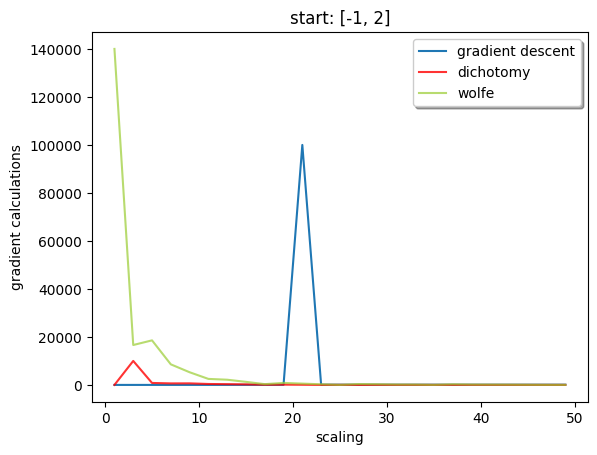

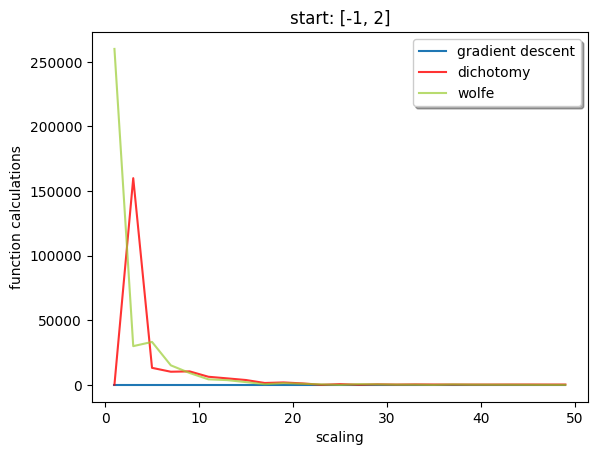

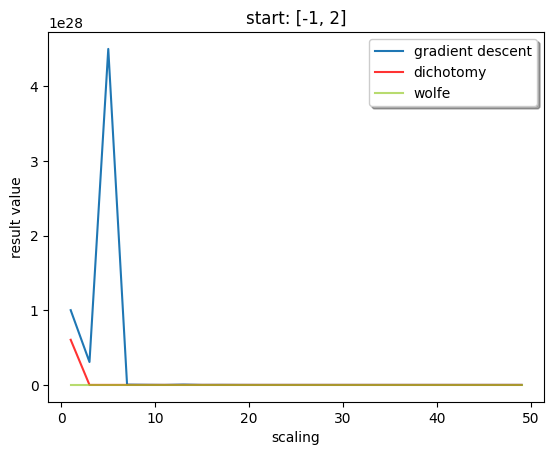

In [23]:
plots_by_start([-1, 2])

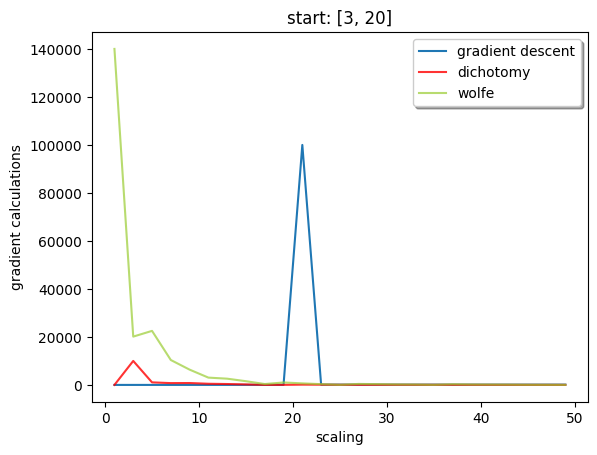

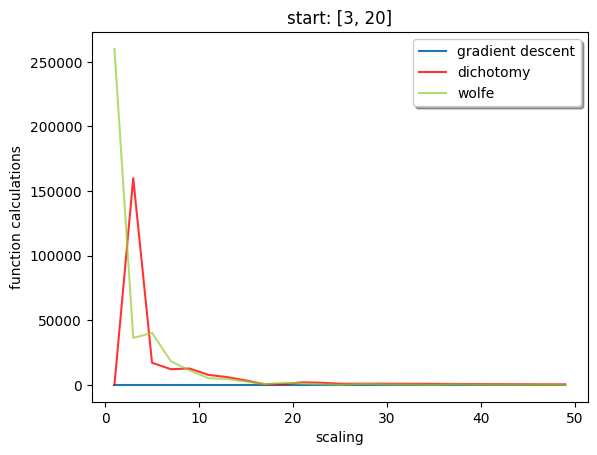

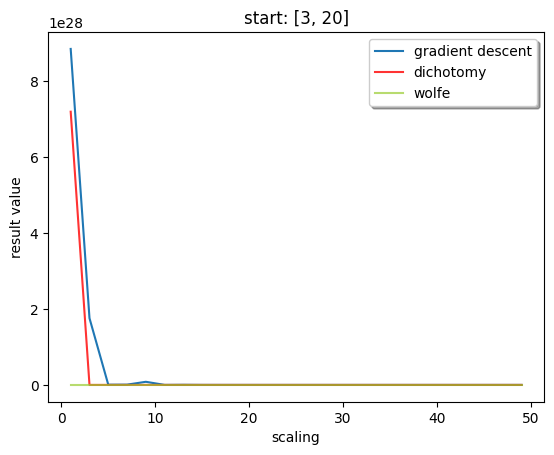

In [24]:
plots_by_start([3, 20])